In [263]:
from google.colab import files
uploaded = files.upload()

Saving nubecyberfinal.xlsx to nubecyberfinal.xlsx


In [264]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.data import load
from string import punctuation
nltk.download('stopwords')
spanish_stopwords=stopwords.words('spanish')
non_words=list(punctuation)
from tqdm import tqdm, trange, tqdm_notebook
from tqdm.notebook import tqdm_notebook
tqdm_notebook.pandas()
df=pd.read_excel('nubecyberfinal.xlsx')
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Hecho
0,Publicidad engañosa e incumplimiento de entreg...
1,"realice la compra desde la aplicacion de , com..."
2,como vendedora independiente pague un cobro an...
3,como vendedora independiente pague un cobro an...
4,como vendedora independiente pague un cobro an...


In [265]:
#prepocesa antes, edtalo como quieras
import spacy
import re
from spacy.lang.es import Spanish
def preprocess(text):
    nlp = Spanish()
    result= []
    for i in trange(0,len(text)):
        text[i]=str(text[i])
        text[i]=re.sub(u'^(?<![a-z A-Z])',' ',text[i])
        text[i]=text[i].lower()
        text[i]=text[i].replace('.','')
        text[i]=text[i].replace(',','')
        text[i]=text[i].replace('°','')
        text[i]=text[i].replace('(','')
        text[i]=text[i].replace(')','')
        text[i]=text[i].replace('"','')
        text[i]=text[i].replace('/','')
        text[i]=text[i].replace('%','')
        text[i]=text[i].replace('+','')
        text[i]=text[i].replace('-','')
        a,b = 'áéíóúü','aeiouu'
        trans = str.maketrans(a,b)
        text[i]=text[i].translate(trans)
        text[i]=text[i].strip()
        doc=nlp(text[i])
        t=[token.text for token in doc if not token.is_punct  if token.is_alpha if token.text not in spanish_stopwords]
        result.append(' '.join(list(t)))
    return result

In [266]:
df['Hecho_temp']=preprocess(df['Hecho'])

100%|██████████| 834/834 [00:01<00:00, 604.90it/s]


In [267]:
from gensim.models import Phrases 
documents =df['Hecho_temp']
sentence_stream = [doc.split(" ") for doc in documents]
bigram = Phrases(sentence_stream, min_count=1, delimiter=b' ')
trigram = Phrases(bigram[sentence_stream], min_count=1, delimiter=b' ')

words_rele=[]
a=[]
for sent in sentence_stream:
    bigrams_ = [b for b in bigram[sent] if b.count(' ') == 1]
    trigrams_ = [t for t in trigram[bigram[sent]] if t.count(' ') == 2]
    words_rele.append(trigrams_)
    a.append(bigrams_)

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [268]:
for i in range(0,len(a)):
  a[0].extend(a[i])

In [312]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(background_color='white',width=1000,height=500,max_words=50,max_font_size=100, scale=10,random_state=2,collocations=True).generate(str(data))
    wordcloud.recolor(random_state=2)
    plt.figure(figsize=(10, 5))
    plt.title(title, fontsize=50,color='blue')
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

In [313]:
bigrams_list=a[0]
print(bigrams_list)

['publicidad engañosa', 'realice compra', 'equipo celular', 'pagina internet', 'campaña cyber', 'mismo dia', 'recibir pedido', 'pagina facebook', 'numero pedido', 'recibi correo', 'recibi correo', 'publicidad engañosa', 'realice compra', 'equipo celular', 'pagina internet', 'campaña cyber', 'mismo dia', 'recibir pedido', 'pagina facebook', 'numero pedido', 'recibi correo', 'recibi correo', 'realice compra', 'pago efectivo', 'saga reconoce', 'compra anula', 'despues haber', 'pagado verificado', 'pago sistema', 'pago efectivo', 'aprovechando descuentos', 'precio normal', 'engaño consumidor', 'vendedora independiente', 'pague cobro', 'anual asistir', 'eventos programados', 'cyberplaza creados', 'productora fan', 'radio solo', 'realizo cyberplaza', 'año pasado', 'mayo postergaron', 'aviso previo', 'pedir devolucion', 'solo devolvieron', 'pago mesinnte', 'via telefonica', 'dos postergaron', 'enero febrero', 'cuales realizaron', 'postergaron abril', 'mayo misma', 'fecha pidiendo', 'devolucio

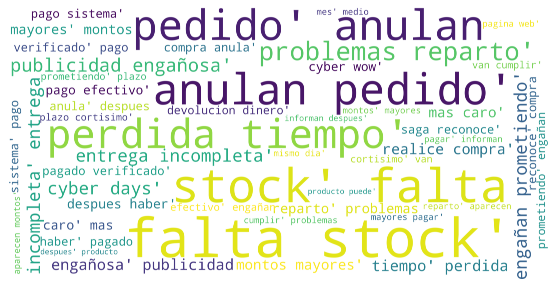

In [314]:
show_wordcloud(bigrams_list)